### Generate Dataset

In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

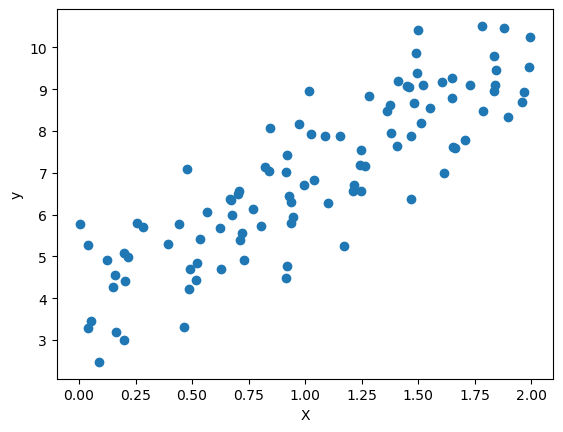

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X , y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

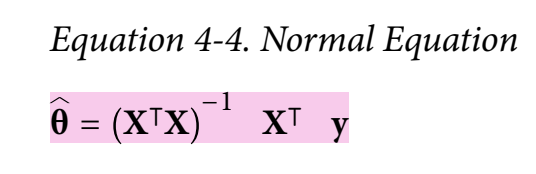

In [3]:
#apply normal equation to get best value of theta
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[3.90280024],
       [2.92657523]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.90280024],
       [9.7559507 ]])

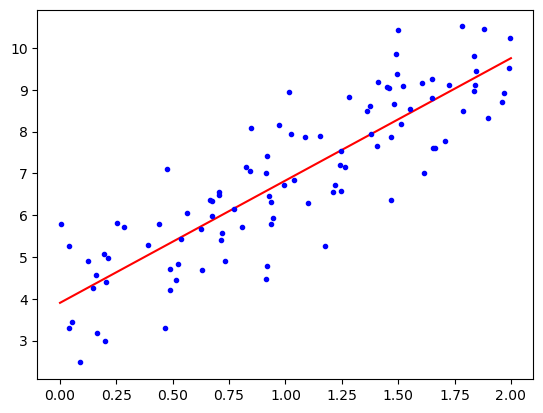

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

### Using Sklearn Classes

In [7]:
#Performing Linear Regression using Scikit-Learn is simple
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.90280024]), array([[2.92657523]]))

In [8]:
lin_reg.predict(X_new)

array([[3.90280024],
       [9.7559507 ]])

### Gradient descent

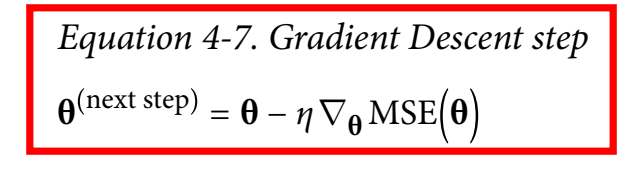

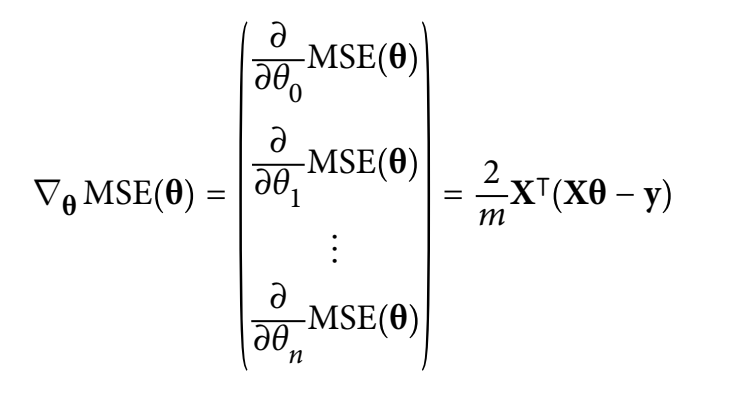

#### Batch Gradient Descent

In [9]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta   

array([[3.90280024],
       [2.92657523]])

### Stochastic Gradient Descent

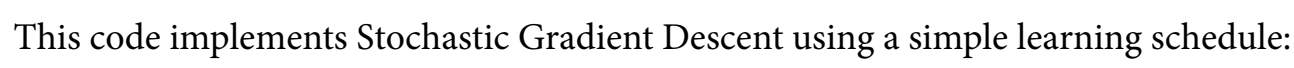

In [10]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [11]:
theta

array([[3.90797706],
       [2.95779563]])

**Note** 
* that since instances are picked randomly, some instances may be picked several times per epoch, while others may not be picked at all. 
* If you want to be sure that the algorithm goes through every instance at each epoch, another approach is to shuffle the training set (making sure to shuffle the input features and the labels jointly), 
* then go through it instance by instance, then shuffle it again, and so on. However, this approach generally converges more slowly.

### SGD using sklearn

In [12]:
from sklearn.linear_model import SGDRegressor
# max_iter: The maximum number of passes over the training data (aka epochs).
# tol =  The stopping criterion. 
# eta0: The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules. 
# The default value is 0.01. Values must be in the range [0.0, inf).
# penalty: The penalty (aka regularization term) to be used. Defaults to ‘l2’ which is the standard regularizer for linear SVM models.
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [13]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.84936804]), array([2.89279512]))

### Mini-batch Gradient Descent

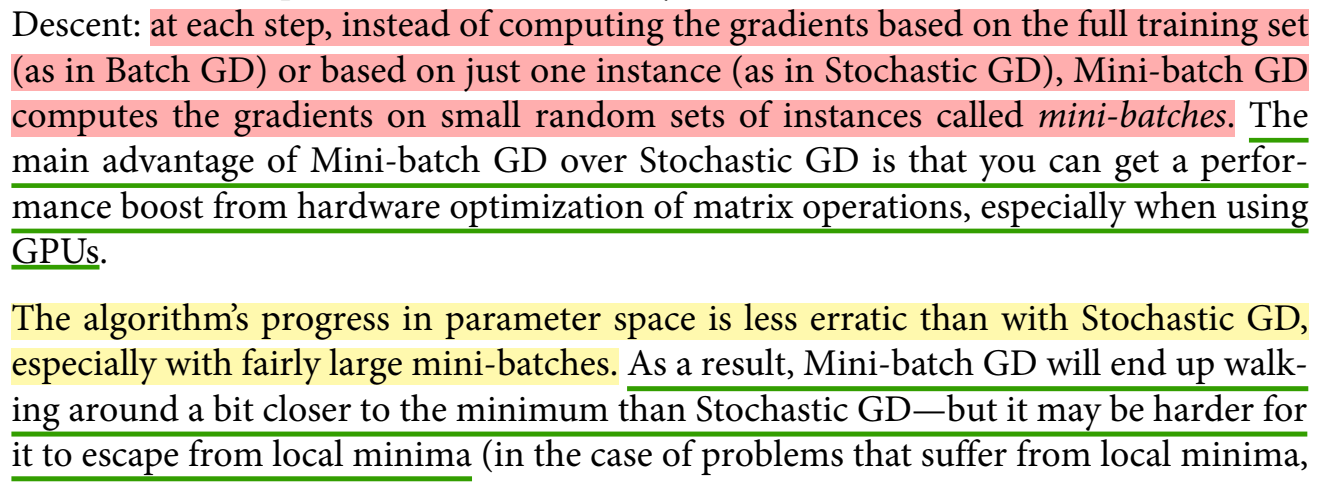

## Polynomial Regression

What if your data is more complex than a straight line? Surprisingly, you can use a linear model to fit nonlinear data. 
A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

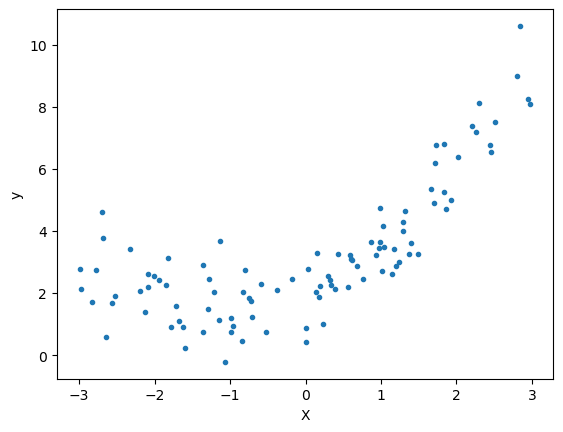

In [69]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X,y,'.');
plt.xlabel("X");
plt.ylabel("y");
plt.show();

In [70]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0] , X_poly[0]

(array([-1.14533039]), array([-1.14533039,  1.31178171]))

In [71]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.99571855]), array([[1.02960389, 0.47068917]]))

In [72]:
pred = lin_reg.predict(X_poly)


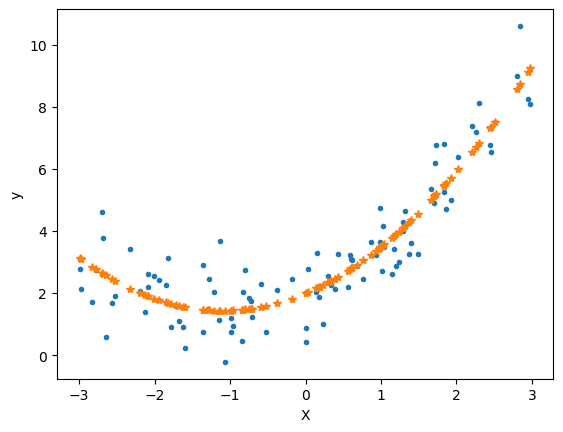

In [74]:
plt.plot(X,y,'.');

plt.plot(X , pred, "*");

plt.xlabel("X");
plt.ylabel("y");
plt.show();

### Learning Curves

* If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression. 
* applies a 300-degree polynomial model to the preceding training data, and compares the result with a pure linear model and a quadratic model (second-degree polynomial). 
* Notice how the 300-degree polynomial model wiggles around to get as close as possible to the training instances.

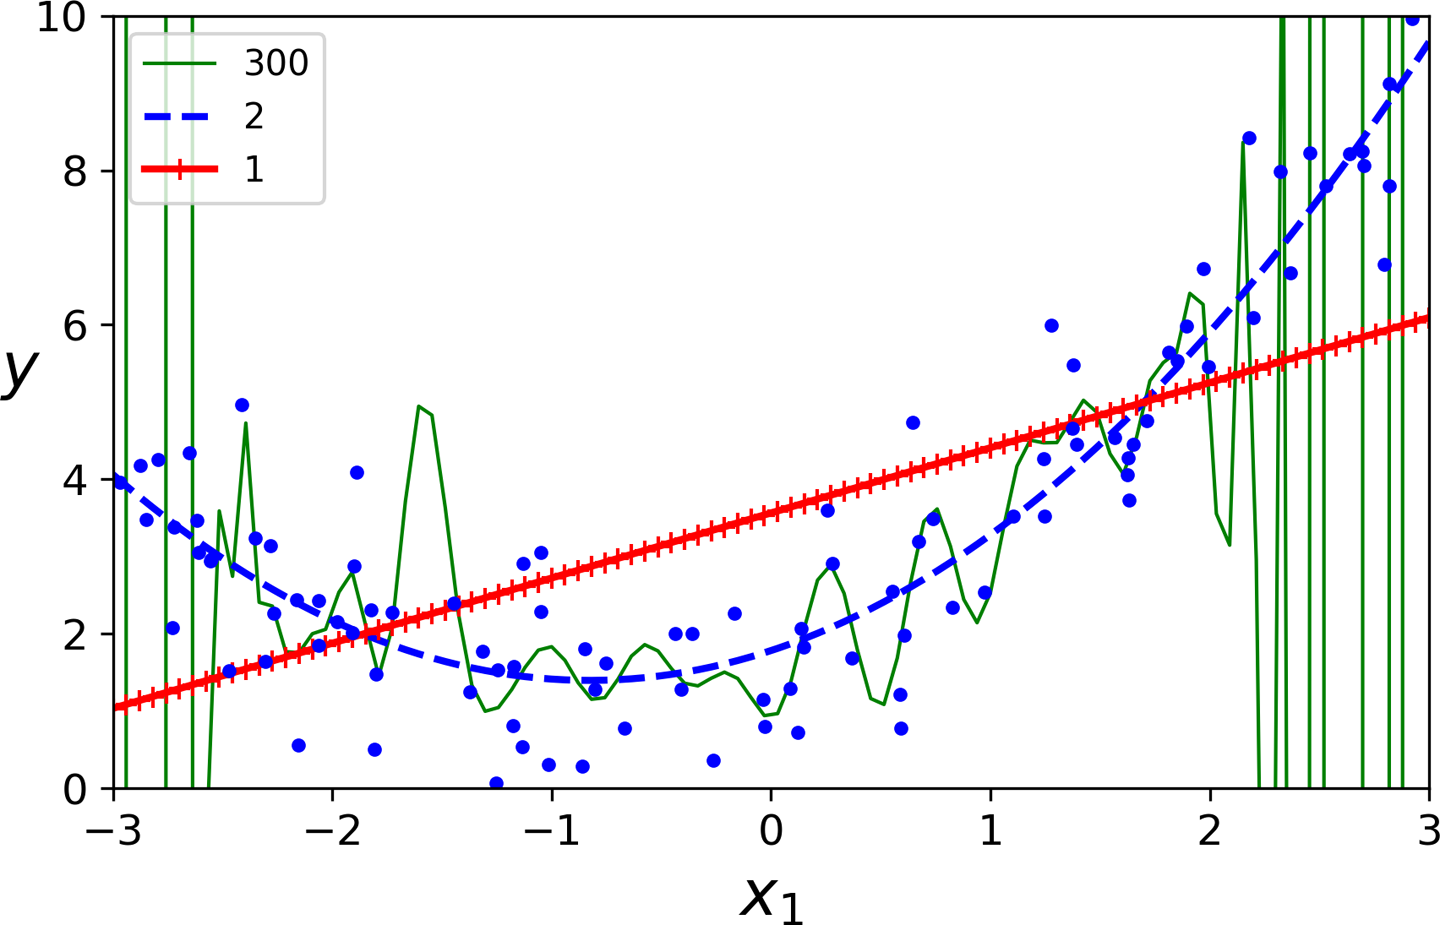

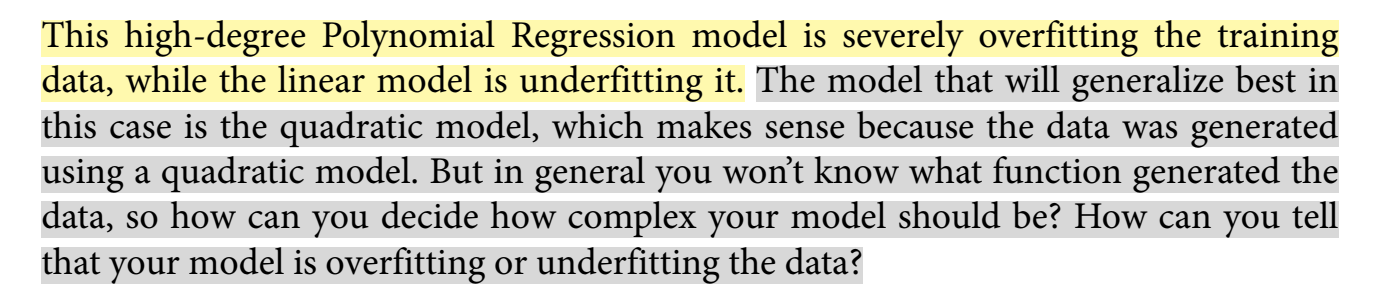

Another way to tell is to look at the learning curves: these are plots of the model’s performance on the training set and the validation set as a function of the training set
size (or the training iteration). To generate the plots, train the model several times on
different sized subsets of the training set. The following code defines a function that,
given some training data, plots the learning curves of a model:

In [75]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    #split dataset into train and test
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    #create two empty lists
    train_errors, val_errors = [], []
    #iterate with number of iteration equal the number of training
    for m in range(1, len(X_train) + 1):
        #train the model iteratively on a part of training dataset and each time this part increase 
        model.fit(X_train[:m], y_train[:m])
        # make model prediction on training dataset which is used in training
        y_train_predict = model.predict(X_train[:m])
        # make model prediction on validation dataset
        y_val_predict = model.predict(X_val)
        #compute error of model prediction on training
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        #compute error of model prediction on validation
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    #plot the train errors 
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    #plot the validation errors
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    #make some legends
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

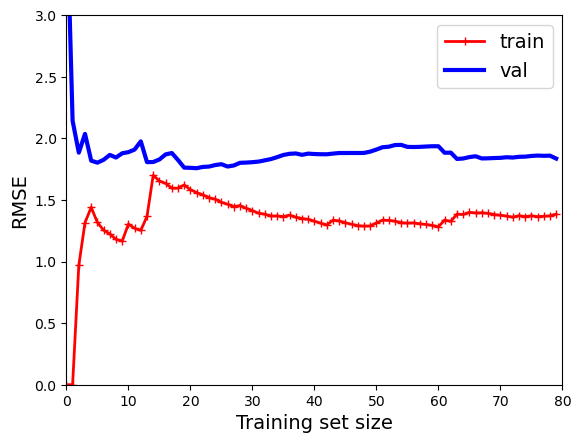

In [76]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
# This line sets the axis limits for the plot. 
#It seems to be setting the x-axis limit from 0 to 80 and the y-axis limit from 0 to 3.
plt.axis([0, 80, 0, 3])
plt.show()

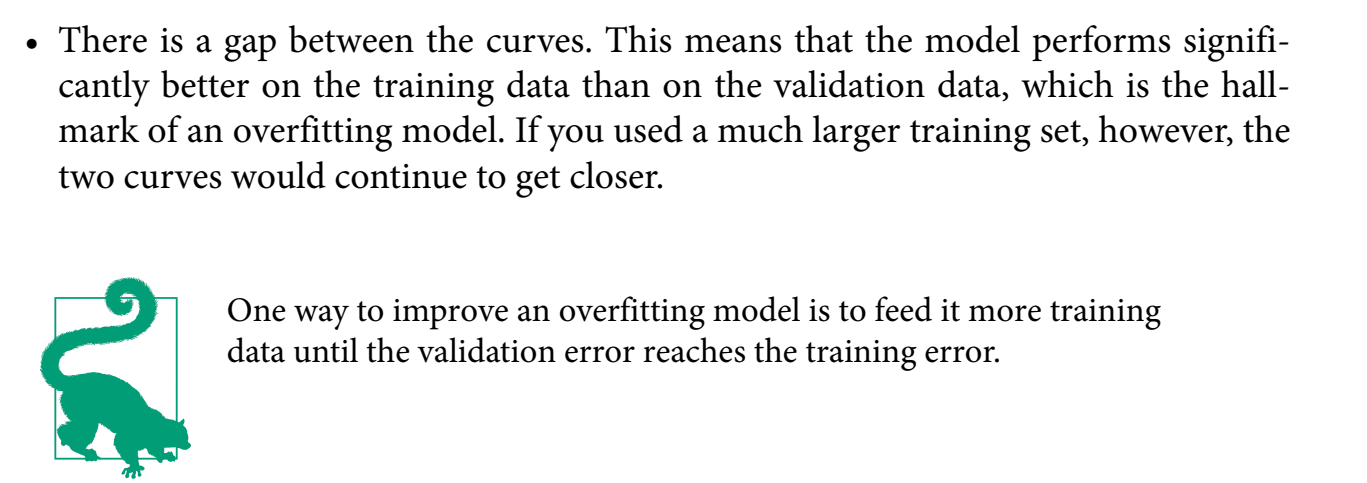

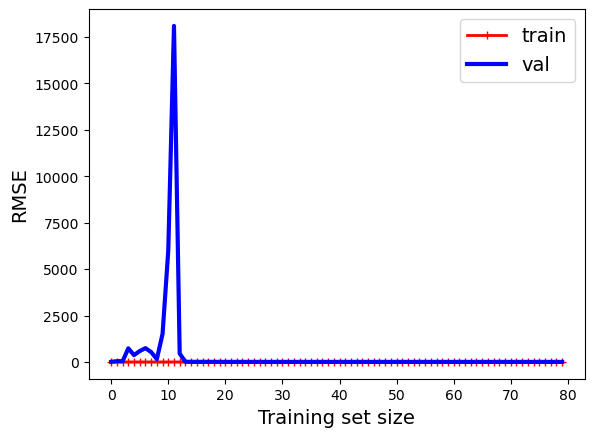

In [77]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                                  ("lin_reg", LinearRegression()),])
                                   
plot_learning_curves(polynomial_regression, X, y)

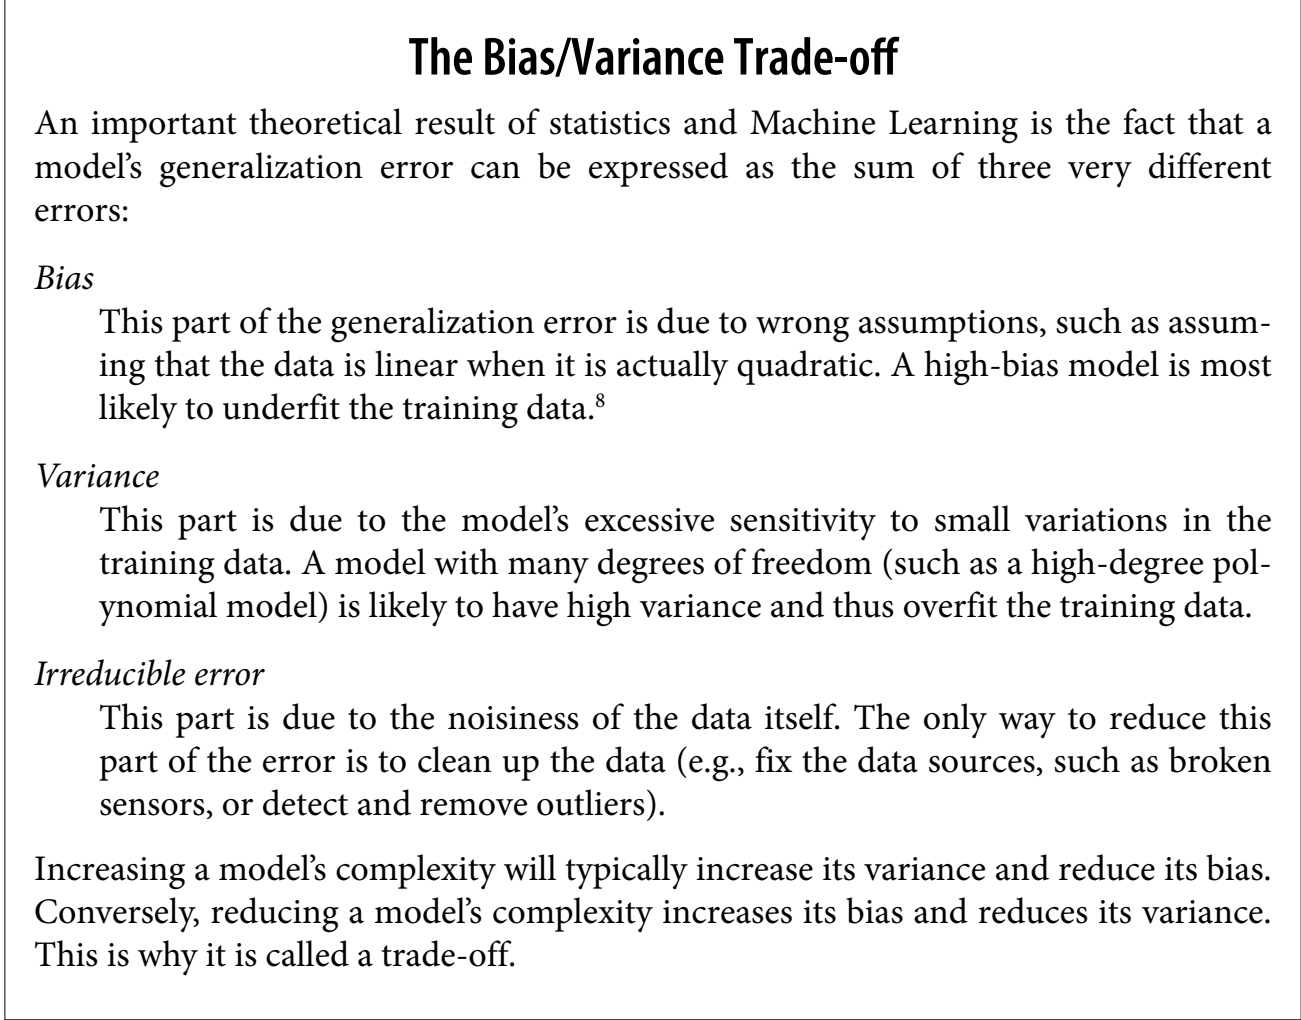

## Regularized Linear Models

a good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, 
the harder it will be for it to overfit the data. 
* A simple way to regularize a polynomial model is to reduce the number of  polynomial degrees. For a linear model, regularization is typically achieved by constraining the weights of the model. 
* We will now look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.